In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [68]:
data = pd.read_csv("data/movies_metadata.csv")
data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,30/10/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,15/12/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602.0,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,22/12/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357.0,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,22/12/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862.0,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,10/02/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050.0,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109.0,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,17/11/2011,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758.0,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,01/08/2003,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0.0,[],NaN,227506.0,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,21/10/1917,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [3]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45463.000000,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,108359.918813,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,112460.749278,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26449.500000,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,60003.000000,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157328.000000,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [69]:
#data = data[["budget","genres"]]
#data = data[["budget","revenue"]]
data = data[["vote_average","revenue"]]
#data = data[["vote_average","runtime"]]
data.dropna(inplace=True)

df = data[(data.T != 0).all()]

df

C:\Users\leoni\AppData\Local\Temp\ipykernel_137344\2455667525.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,vote_average,revenue
0,7.7,373554033.0
1,6.9,262797249.0
3,6.1,81452156.0
4,5.7,76578911.0
5,7.7,187436818.0
...,...,...
45399,6.0,3.0
45401,6.3,50656.0
45409,5.8,1328612.0
45412,4.0,1268793.0


In [83]:
df.describe()

,vote_average,revenue,vote_average_t,revenue_t,kmeans_3
count,7370.000000,7.370000e+03,7.370000e+03,7.370000e+03,7370.000000
mean,6.249607,6.913672e+07,1.349742e-16,-2.699484e-17,1.191045
std,0.928175,1.467160e+08,1.000068e+00,1.000068e+00,1.192948
min,0.500000,1.000000e+00,-6.194946e+00,-4.712603e-01,0.000000
25%,5.700000,2.461411e+06,-5.921767e-01,-4.544824e-01,0.000000
50%,6.300000,1.699595e+07,5.429675e-02,-3.554099e-01,1.000000
75%,6.900000,6.785424e+07,7.007702e-01,-8.741833e-03,2.000000
max,10.000000,2.787965e+09,4.040883e+00,1.853249e+01,3.000000


In [5]:
import ast

def convert(obj):
    L =[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [46]:
df['genres'] = df['genres'].apply(convert)
df

C:\Users\leoni\AppData\Local\Temp\ipykernel_137344\3017883109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].apply(convert)


,budget,genres
0,30000000.0,"[Animation, Comedy, Family]"
1,65000000.0,"[Adventure, Fantasy, Family]"
3,16000000.0,"[Comedy, Drama, Romance]"
5,60000000.0,"[Action, Crime, Drama, Thriller]"
6,58000000.0,"[Comedy, Romance]"
...,...,...
45402,2000000.0,[Comedy]
45408,2000000.0,[Comedy]
45409,800000.0,"[Comedy, Drama]"
45412,2000000.0,"[Romance, Drama]"


In [48]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('genres')),
                index=df.index,
                columns=mlb.classes_))
            

df

,budget,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0.244711,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.264861,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.163349,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1.119125,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,1.060831,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45402,-0.571408,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45408,-0.571408,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45409,-0.606385,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
45412,-0.571408,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
scaler = StandardScaler()

In [70]:
#df[["budget"]] = scaler.fit_transform(df[["budget"]])
#df[["budget_t","revenue_t"]] = scaler.fit_transform(df[["budget","revenue"]])
df[["vote_average_t","revenue_t"]] = scaler.fit_transform(df[["vote_average","revenue"]])
#df[["vote_average_t","runtime_t"]] = scaler.fit_transform(df[["vote_average","runtime"]])

df

C:\Users\leoni\AppData\Local\Temp\ipykernel_137344\887804915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["vote_average_t","revenue_t"]] = scaler.fit_transform(df[["vote_average","revenue"]])
C:\Users\leoni\AppData\Local\Temp\ipykernel_137344\887804915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["vote_average_t","revenue_t"]] = scaler.fit_transform(df[["vote_average","revenue"]])


,vote_average,revenue,vote_average_t,revenue_t
0,7.7,373554033.0,1.562735,2.075016
1,6.9,262797249.0,0.700770,1.320059
3,6.1,81452156.0,-0.161194,0.083946
4,5.7,76578911.0,-0.592177,0.050729
5,7.7,187436818.0,1.562735,0.806375
...,...,...,...,...
45399,6.0,3.0,-0.268940,-0.471260
45401,6.3,50656.0,0.054297,-0.470915
45409,5.8,1328612.0,-0.484431,-0.462204
45412,4.0,1268793.0,-2.423851,-0.462612


In [11]:
def optimise_k_means(data, max_k):
    means = [];
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

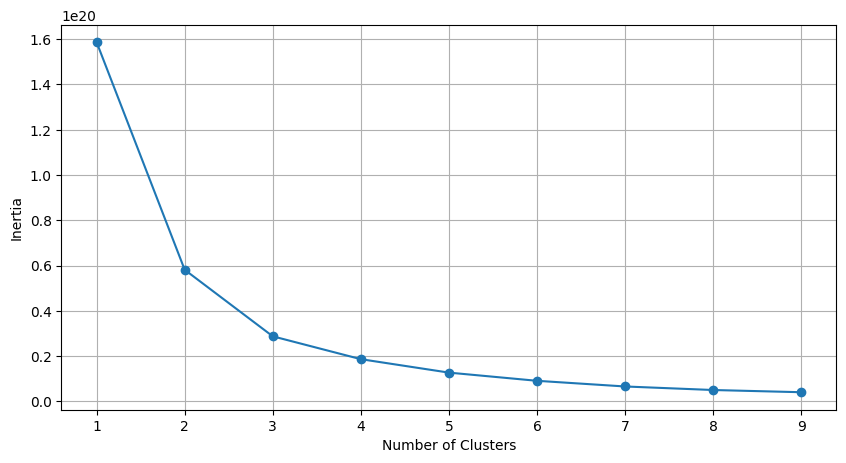

In [71]:
optimise_k_means(df,10)

In [72]:
kmeans = KMeans(n_clusters=4)

In [73]:
#kmeans.fit(df)
kmeans.fit(df[["vote_average_t","revenue_t"]])
#kmeans.fit(df[["vote_average_t","runtime_t"]])

KMeans(n_clusters=4)

In [74]:
df["kmeans_3"] = kmeans.labels_

C:\Users\leoni\AppData\Local\Temp\ipykernel_137344\2856239826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["kmeans_3"] = kmeans.labels_


In [75]:
df

,vote_average,revenue,vote_average_t,revenue_t,kmeans_3
0,7.7,373554033.0,1.562735,2.075016,1
1,6.9,262797249.0,0.700770,1.320059,2
3,6.1,81452156.0,-0.161194,0.083946,0
4,5.7,76578911.0,-0.592177,0.050729,0
5,7.7,187436818.0,1.562735,0.806375,2
...,...,...,...,...,...
45399,6.0,3.0,-0.268940,-0.471260,0
45401,6.3,50656.0,0.054297,-0.470915,0
45409,5.8,1328612.0,-0.484431,-0.462204,0
45412,4.0,1268793.0,-2.423851,-0.462612,3


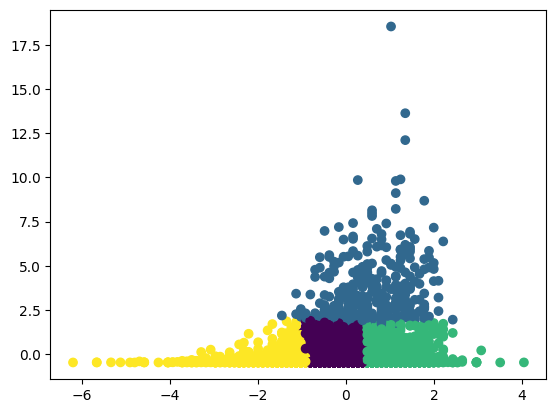

In [81]:
#plt.scatter(x=df["Action"],y=df["budget"],c=df["kmeans_3"])
plt.scatter(x=df["vote_average_t"],y=df["revenue_t"],c=df["kmeans_3"])
#plt.scatter(x=df["vote_average"],y=df["runtime"],c=df["kmeans_3"])

#plt.ylim=(3,1.5)
#plt.xlim=(-0.1,1)

plt.show()
